___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv("Ready_to_ML.csv")

df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,Alloy wheels,1270.0,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,Dealer,1.0,1.0,0.0,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,Dealer,1991.0,8.0,162.0,4WD,Alloy wheels,1555.0,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Sport seats,1455.0,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Alloy wheels,1545.0,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [8]:
df.drop(["location", "make"], axis=1, inplace=True)

In [10]:
df.make_model.value_counts()

make_model
Renault Megane       832
SEAT Leon            784
Volvo V40            740
Dacia Sandero        730
Hyundai i30          706
                    ... 
Toyota Prius+          1
Peugeot iOn            1
Peugeot 106            1
Mercedes-Benz SLR      1
Renault R 11           1
Name: count, Length: 490, dtype: int64

In [12]:
wanted = df.make_model.value_counts()[df.make_model.value_counts() > 100].index

In [14]:
df = df[df.make_model.isin(wanted)]

In [16]:
df.shape

(19744, 25)

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(16630, 25)

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

### Converting the Extras feature from object to numeric

In [22]:
df["extras"] = df.extras.str.count(',') + 1

In [24]:
for col in df.columns:
    print(df[col].value_counts())
    print('---' * 15)

make_model
Renault Megane    809
SEAT Leon         733
Opel Astra        627
Hyundai i30       557
Ford Mustang      544
                 ... 
Volvo V90         104
Nissan Juke        99
Toyota RAV 4       98
Hyundai IONIQ      97
Nissan Pulsar      70
Name: count, Length: 70, dtype: int64
---------------------------------------------
price
16990.0    128
14990.0    123
19990.0    118
12990.0    117
18990.0    112
          ... 
27818.0      1
13551.0      1
21773.0      1
16385.0      1
36795.0      1
Name: count, Length: 3650, dtype: int64
---------------------------------------------
body_type
Sedan               3577
Compact             3273
Station wagon       3259
Off-Road/Pick-up    3197
Convertible         1682
Coupe               1642
Name: count, dtype: int64
---------------------------------------------
type
Used              14605
Pre-registered      877
Demonstration       772
Employee's car      376
Name: count, dtype: int64
---------------------------------------------
w

## multicollinearity control

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [26]:
df.corr(numeric_only=True) > 0.9

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
price,True,False,False,False,False,False,False,False,False,False,False
mileage,False,True,False,False,False,False,False,False,False,False,False
engine_size,False,False,True,False,False,False,False,False,False,False,False
gears,False,False,False,True,False,False,False,False,False,False,False
co_emissions,False,False,False,False,True,False,False,False,False,False,False
extras,False,False,False,False,False,True,False,False,False,False,False
empty_weight,False,False,False,False,False,False,True,False,False,False,False
previous_owner,False,False,False,False,False,False,False,True,False,False,False
age,False,False,False,False,False,False,False,False,True,False,False
power_kW,False,False,False,False,False,False,False,False,False,True,False


### Train | Test Split

In [30]:
from sklearn.model_selection import train_test_split

X= df.drop(columns="price")
y= df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

## Scaling

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [34]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [36]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_type,
                                                     cat_for_comfort,
                                                     cat_for_ent,
                                                     cat_for_safety]),cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False).set_output(transform='pandas')

In [38]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [40]:
pd.options.display.float_format = '{:.3f}'.format
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : root_mean_squared_error(y_train, y_train_pred),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : root_mean_squared_error(y_test, y_pred),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [44]:
from sklearn.linear_model import LinearRegression

vanilla_model = LinearRegression()
vanilla_model.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
vanilla_scores = train_val(vanilla_model, X_train_scaled, y_train, X_test_scaled, y_test)
vanilla_scores

,train,test
R2,0.827,0.855
mae,2961.081,2891.942
mse,29222539.225,22643637.338
rmse,5405.788,4758.533
mape,0.212,0.192


In [50]:
y_pred = vanilla_model.predict(X_test_scaled)

In [52]:
adj_r2(y_test, y_pred, X_test_scaled)

0.8504088806285748

## Cross Validate

In [54]:
from sklearn.model_selection import cross_validate

In [56]:
scores = cross_validate(LinearRegression(), X_train_scaled, y_train, 
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        return_train_score=True)

In [58]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.829
train_r2                                           0.828
test_neg_mean_absolute_error                   -2985.419
train_neg_mean_absolute_error                  -2960.440
test_neg_mean_squared_error                -29711395.035
train_neg_mean_squared_error               -29196779.201
test_neg_root_mean_squared_error               -5360.605
train_neg_root_mean_squared_error              -5402.087
test_neg_mean_absolute_percentage_error           -0.214
train_neg_mean_absolute_percentage_error          -0.212
dtype: float64

In [60]:
vanilla_scores

,train,test
R2,0.827,0.855
mae,2961.081,2891.942
mse,29222539.225,22643637.338
rmse,5405.788,4758.533
mape,0.212,0.192


## Prediction Error

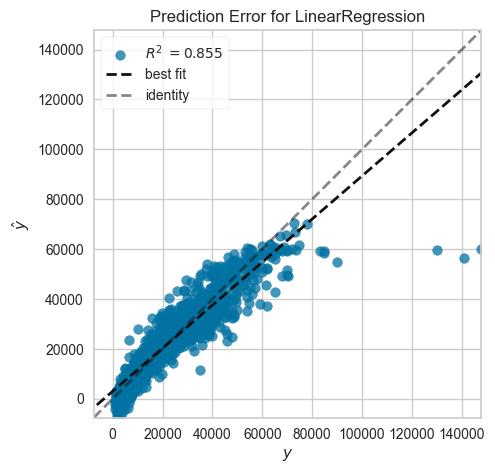

In [62]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();


## Residual Plot

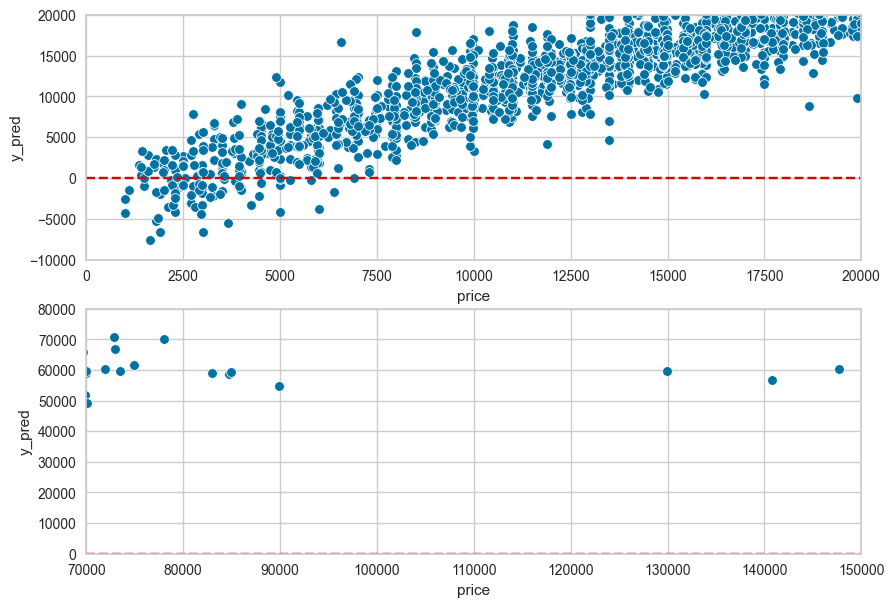

In [64]:
y_pred=vanilla_model.predict(X_test_scaled)

plt.figure(figsize=(10,7))

plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred)
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([0,20000])
plt.ylim([-10000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred)
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([70000, 150000])
plt.ylim([0,80000])
plt.show();

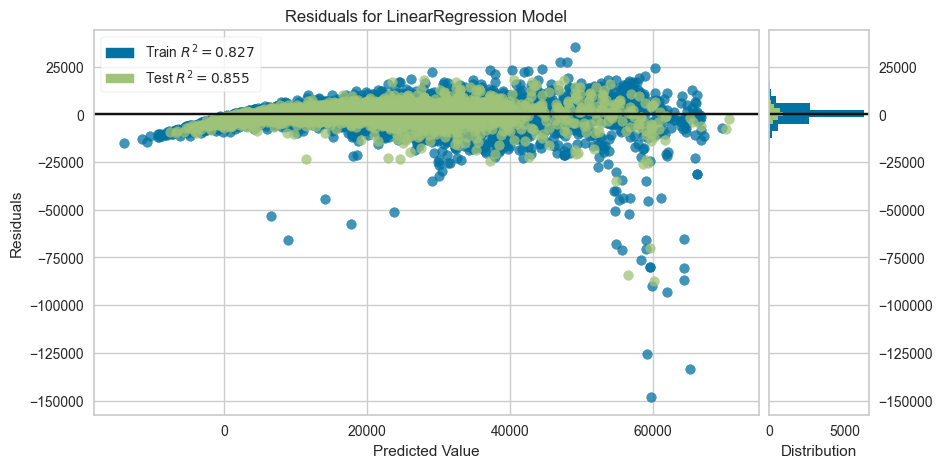

In [68]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [66]:
df2 = df.copy()

In [70]:
df = df[(df.price > 7500) & (df.price < 70000)]

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [72]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [74]:
X_train= column_trans.fit_transform(X_train)
X_test= column_trans.transform(X_test)

In [76]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [80]:
linear_scores = train_val(linear_model, X_train_scaled, y_train, X_test_scaled, y_test)
linear_scores

,train,test
R2,0.878,0.880
mae,2635.105,2622.553
mse,14866558.510,13928338.062
rmse,3855.718,3732.069
mape,0.133,0.134


In [82]:
vanilla_scores

,train,test
R2,0.827,0.855
mae,2961.081,2891.942
mse,29222539.225,22643637.338
rmse,5405.788,4758.533
mape,0.212,0.192


## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [84]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [90]:
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_type, cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans2 = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [92]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans2), ("scaler", StandardScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('Ridge', Ridge())])

In [94]:
ridge_scores = train_val(ridge_model, X_train, y_train, X_test, y_test)
ridge_scores

,train,test
R2,0.879,0.875
mae,2656.749,2579.597
mse,14961250.897,13544708.954
rmse,3867.978,3680.314
mape,0.133,0.134


## Cross Validation

In [96]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", StandardScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [98]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.876
train_r2                                           0.880
test_neg_mean_absolute_error                   -2685.044
train_neg_mean_absolute_error                  -2655.747
test_neg_mean_squared_error                -15330767.060
train_neg_mean_squared_error               -14942186.166
test_neg_root_mean_squared_error               -3907.484
train_neg_root_mean_squared_error              -3865.413
test_neg_mean_absolute_percentage_error           -0.135
train_neg_mean_absolute_percentage_error          -0.133
dtype: float64

## Finding best alpha for Ridge

In [100]:
from sklearn.model_selection import GridSearchCV

alpha_space = np.linspace(0.01, 10, 100)

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", StandardScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space}

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [102]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('...
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [104]:
ridge_grid_model.best_params_

{'Ridge__alpha': 10.0}

In [108]:
ridge_grid_scores = train_val(ridge_grid_model, X_train, y_train, X_test, y_test)
ridge_grid_scores

,train,test
R2,0.879,0.875
mae,2656.290,2578.919
mse,14961571.665,13538072.575
rmse,3868.019,3679.412
mape,0.133,0.134


## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [110]:
from sklearn.linear_model import Lasso

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", StandardScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('Lasso', Lasso())])

In [112]:
lasso_scores = train_val(lasso_model, X_train, y_train, X_test, y_test)
lasso_scores

,train,test
R2,0.879,0.875
mae,2656.331,2578.549
mse,14961734.332,13535121.256
rmse,3868.040,3679.011
mape,0.133,0.134


## Cross Validation

In [114]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", StandardScaler()),
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [116]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.876
train_r2                                           0.880
test_neg_mean_absolute_error                   -2684.519
train_neg_mean_absolute_error                  -2655.317
test_neg_mean_squared_error                -15330729.125
train_neg_mean_squared_error               -14942677.808
test_neg_root_mean_squared_error               -3907.425
train_neg_root_mean_squared_error              -3865.476
test_neg_mean_absolute_percentage_error           -0.135
train_neg_mean_absolute_percentage_error          -0.133
dtype: float64

## Finding best alpha for Lasso

In [132]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", StandardScaler()),
              ("Lasso", Lasso(max_iter=10000))]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':np.linspace(0.1, 5, 20)}

lasso_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs=-1,
                          return_train_score=True)

In [134]:
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('o...
                                       ('scaler', StandardScaler()),
                                       ('Lasso', Lasso(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'Lasso__alpha': array([0.1       , 0.35789474, 0.61578947, 0.87368421, 1.13157895,
       1.38947368, 1.64736842, 1.90526316, 2.16315789, 2.42105263,
       2.67894737, 2.93684211, 3.19473684, 3.45263158, 3.71052632,
       3.96842105, 4.22631579, 4.48421053, 4.74210526, 5.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [136]:
lasso_grid.best_params_

{'Lasso__alpha': 0.8736842105263158}

In [138]:
lasso_grid_scores = train_val(lasso_grid, X_train, y_train, X_test, y_test)
lasso_grid_scores

,train,test
R2,0.879,0.875
mae,2656.402,2578.680
mse,14961626.004,13536208.426
rmse,3868.026,3679.159
mape,0.133,0.134


## Feature Importance

In [141]:
df_feat_imp = pd.DataFrame(
                         data=lasso_grid.best_estimator_["Lasso"].coef_,
                         index=lasso_grid.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
                         columns=["Coef"]
                         ).sort_values("Coef")

In [143]:
df_feat_imp

,Coef
age,-3330.748
mileage,-2733.802
make_model_Ford Mustang,-1171.964
make_model_Nissan 370Z,-811.260
drivetrain_Front,-614.774
...,...
engine_size,1039.935
make_model_Volvo XC60,1144.185
make_model_Volvo XC90,1245.980
drivetrain_Rear,1544.249


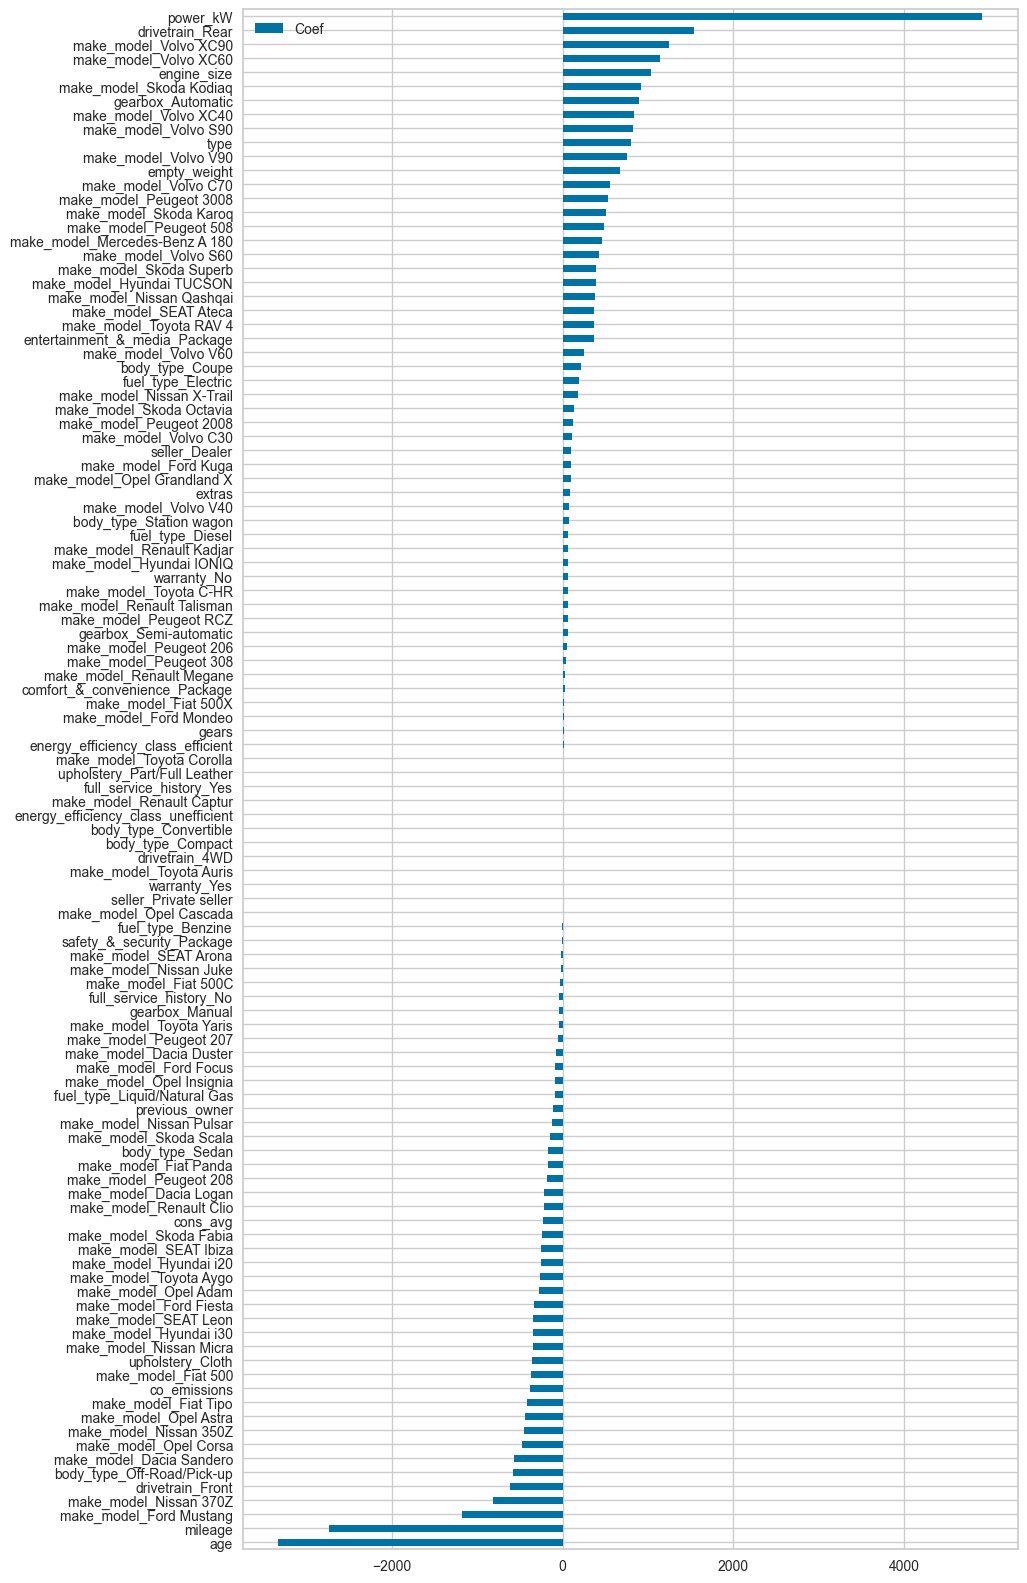

In [145]:
df_feat_imp.plot(kind='barh', figsize=(10, 20));

In [147]:
df_new = df[['make_model', 'power_kW', 'engine_size', 'empty_weight', 'fuel_type', 'mileage', 'age', 'price']]

In [149]:
df_new.head(1)

,make_model,power_kW,engine_size,empty_weight,fuel_type,mileage,age,price
13,Mercedes-Benz A 180,85.000,1461.000,1330.000,Diesel,27150.000,2.000,24400.000


In [151]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
cat_onehot = ['make_model', 'fuel_type']

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [157]:
operations = [("OneHot_Encoder", column_trans),
              ("scaler", StandardScaler()),
              ("Lasso", Lasso(alpha=0.8736842105263158))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.8736842105263158))])

In [159]:
lasso_final_scores = train_val(lasso_final_model, X_train, y_train, X_test, y_test)
lasso_final_scores

,train,test
R2,0.865,0.861
mae,2860.200,2759.930
mse,16788941.984,15069043.113
rmse,4097.431,3881.887
mape,0.145,0.144


## Prediction a new observation
- Create an observation and predict its price

In [161]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [163]:
operations = [("OneHot_Encoder", column_trans),
              ("scaler", StandardScaler()),
              ("Lasso", Lasso(alpha=0.8736842105263158))]
final_model = Pipeline(steps=operations)

In [165]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.8736842105263158))])

In [169]:
X.head(1)

,make_model,power_kW,engine_size,empty_weight,fuel_type,mileage,age
13,Mercedes-Benz A 180,85.000,1461.000,1330.000,Diesel,27150.000,2.000


In [171]:
p_sample = {'make_model':'Mercedes-Benz A 180',
           'power_kW': 100,
           'engine_size': 1332,
           'empty_weight': 1395,
           'fuel_type': 'Benzine',
           'mileage': 1000,
           'age': 1}

new_observation = pd.DataFrame([p_sample])
new_observation

,make_model,power_kW,engine_size,empty_weight,fuel_type,mileage,age
0,Mercedes-Benz A 180,100,1332,1395,Benzine,1000,1


In [173]:
final_model.predict(new_observation)

array([33141.30395408])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___